In [60]:
import sys

print('Python info', sys.version)

Python info 3.8.3 (default, Jul  2 2020, 16:21:59) 
[GCC 7.3.0]


In [61]:
import os

print('This is the curent directory', os.getcwd())

This is the curent directory /home/gda/Documents/github/ppforde/python/books


In [62]:
import datetime
import pytz

current_date = datetime.date.today()
current_time = datetime.datetime.now()
local_time = datetime.datetime.today().astimezone(pytz.timezone("America/New_York"))

print("System date/time", current_time)
print("Local date/time", local_time)

System date/time 2021-12-26 09:45:10.113727
Local date/time 2021-12-26 09:45:10.113755-05:00


In [63]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

print('Pandas version', pd.__version__)
print('Numpy version', np.__version__)
print('Matplotlib version', mpl.__version__)

Pandas version 1.0.5
Numpy version 1.18.5
Matplotlib version 3.2.2


In [64]:
pd.options.display.float_format = '{:,.2f}'.format
pd.set_option('display.precision', 2)
pd.set_option('max_rows', 250)
pd.set_option('max_columns', 250)

from pylab import rcParams
%matplotlib inline
rcParams['figure.figsize'] = 5, 4
plt.style.use('seaborn-whitegrid')

In [65]:
import re
import string
from pprint import pprint
import collections
from collections import Counter

In [66]:
%pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [67]:
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.util import ngrams

nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/gda/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [68]:
%pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [69]:
from wordcloud import WordCloud

In [70]:
%pip install wget

Note: you may need to restart the kernel to use updated packages.


In [71]:
import wget

In [72]:
URL = 'http://www.gutenberg.org/files/120/120-0.txt'

In [73]:
print(URL)

http://www.gutenberg.org/files/120/120-0.txt


In [74]:
book = wget.download(URL)

In [75]:
with open(book, encoding='utf-8-sig') as f:
    data = f.read()

type(data)

str

In [76]:
pprint(data[0:1000])

('The Project Gutenberg EBook of Treasure Island, by Robert Louis Stevenson\n'
 '\n'
 'This eBook is for the use of anyone anywhere in the United States and most\n'
 'other parts of the world at no cost and with almost no restrictions\n'
 'whatsoever.  You may copy it, give it away or re-use it under the terms of\n'
 'the Project Gutenberg License included with this eBook or online at\n'
 "www.gutenberg.org.  If you are not located in the United States, you'll "
 'have\n'
 'to check the laws of the country where you are located before using this '
 'ebook.\n'
 '\n'
 'Title: Treasure Island\n'
 '\n'
 'Author: Robert Louis Stevenson\n'
 '\n'
 'Illustrator: Louis Rhead\n'
 '\n'
 'Release Date: March 13, 1994 [EBook #120]\n'
 '[Most recently updated: October 28, 2020]\n'
 '\n'
 'Language: English\n'
 '\n'
 'Character set encoding: UTF-8\n'
 '\n'
 '*** START OF THIS PROJECT GUTENBERG EBOOK TREASURE ISLAND ***\n'
 '\n'
 '\n'
 '\n'
 '\n'
 'Produced by Judy Boss, John Hamm, Arthur DiBianca and

In [77]:
data.rfind('END')

382356

In [78]:
pprint(data[381000:])

('t its\n'
 'volunteers and employees are scattered throughout numerous\n'
 'locations. Its business office is located at 809 North 1500 West, Salt\n'
 'Lake City, UT 84116, (801) 596-1887. Email contact links and up to\n'
 "date contact information can be found at the Foundation's web site and\n"
 'official page at www.gutenberg.org/contact\n'
 '\n'
 'For additional contact information:\n'
 '\n'
 '    Dr. Gregory B. Newby\n'
 '    Chief Executive and Director\n'
 '    gbnewby@pglaf.org\n'
 '\n'
 'Section 4. Information about Donations to the Project Gutenberg\n'
 'Literary Archive Foundation\n'
 '\n'
 'Project Gutenberg-tm depends upon and cannot survive without wide\n'
 'spread public support and donations to carry out its mission of\n'
 'increasing the number of public domain and licensed works that can be\n'
 'freely distributed in machine readable form accessible by the widest\n'
 'array of equipment including outdated equipment. Many small donations\n'
 '($1 to $5,000) are partic

In [79]:
def regex(pattern, string):
    patt = re.compile(pattern)
    matches = patt.finditer(string)    
    return list(matches)

In [80]:
# Number of lines?
len(regex(r'\n', data))

7891

In [81]:
# Phone Numbers?
regex(r'\d{3}[.-]\d{3}[.-]\d{4}', data)

[]

In [82]:
# Emails?
email = r'[a-zA-Z0-9_.+-]+@[a-zA-Z0-9-]+\.[a-zA-Z0-9-.]+'
regex(email, data)

[<re.Match object; span=(381417, 381434), match='gbnewby@pglaf.org'>]

In [83]:
# Websites?
regex(r'https?://(www\.)?(\w+)(\.\w+)', data)

[<re.Match object; span=(365458, 365482), match='http://www.gutenberg.org'>]

In [84]:
# Mr/Ms/Mrs?
regex(r'(Mr|Ms|Mrs)\.?\s[A-Z]\w*', data)

[<re.Match object; span=(25018, 25030), match='Mrs. Hawkins'>,
 <re.Match object; span=(26502, 26511), match='Mr. Bones'>,
 <re.Match object; span=(42109, 42122), match='Mrs. Crossley'>,
 <re.Match object; span=(46359, 46372), match='Mrs. Crossley'>,
 <re.Match object; span=(57753, 57762), match='Mr. Dance'>,
 <re.Match object; span=(58444, 58453), match='Mr. Dance'>,
 <re.Match object; span=(59511, 59520), match='Mr. Dance'>,
 <re.Match object; span=(59877, 59886), match='Mr. Dance'>,
 <re.Match object; span=(60195, 60204), match='Mr. Dance'>,
 <re.Match object; span=(60456, 60465), match='Mr. Dance'>,
 <re.Match object; span=(61133, 61142), match='Mr. Dance'>,
 <re.Match object; span=(61715, 61728), match='Mr.\nTrelawney'>,
 <re.Match object; span=(61999, 62008), match='Mr. Dance'>,
 <re.Match object; span=(62031, 62040), match='Mr. Dance'>,
 <re.Match object; span=(62289, 62298), match='Mr. Dance'>,
 <re.Match object; span=(63068, 63077), match='Mr. Dance'>,
 <re.Match object; span=

In [85]:
# Names?
regex(r"[A-Z][a-z]{1,20}\s[A-Z][a-z]{1,20}\s", data)

[<re.Match object; span=(0, 12), match='The Project '>,
 <re.Match object; span=(51, 64), match='Robert Louis '>,
 <re.Match object; span=(127, 141), match='United States '>,
 <re.Match object; span=(297, 315), match='Project Gutenberg '>,
 <re.Match object; span=(526, 542), match='Treasure Island\n'>,
 <re.Match object; span=(551, 564), match='Robert Louis '>,
 <re.Match object; span=(588, 600), match='Louis Rhead\n'>,
 <re.Match object; span=(856, 869), match='David Widger\n'>,
 <re.Match object; span=(893, 906), match='Robert Louis '>,
 <re.Match object; span=(1846, 1856), match='Or Cooper '>,
 <re.Match object; span=(2064, 2072), match='The Old '>,
 <re.Match object; span=(2427, 2435), match='The Sea '>,
 <re.Match object; span=(2793, 2802), match='My Shore '>,
 <re.Match object; span=(2999, 3012), match='The Stockade\n'>,
 <re.Match object; span=(3543, 3550), match='My Sea '>,
 <re.Match object; span=(3911, 3926), match='Captain Silver\n'>,
 <re.Match object; span=(4391, 4399), ma

In [86]:
# Titles?
regex(r"([A-Z][a-z]{1,20}\s){5,}", data)

[<re.Match object; span=(130020, 130049), match='How My Shore Adventure Began\n'>,
 <re.Match object; span=(217488, 217515), match='How My Sea Adventure Began\n'>,
 <re.Match object; span=(368557, 368607), match='The Project Gutenberg Literary Archive Foundation>,
 <re.Match object; span=(375470, 375516), match='Project Gutenberg Literary Archive Foundation '>,
 <re.Match object; span=(380004, 380050), match='Project\nGutenberg Literary Archive Foundation '>,
 <re.Match object; span=(380176, 380222), match='Project Gutenberg Literary\nArchive Foundation '>,
 <re.Match object; span=(380381, 380427), match='Project Gutenberg Literary Archive Foundation\n'>,
 <re.Match object; span=(380428, 380478), match='The Project Gutenberg Literary Archive Foundation>,
 <re.Match object; span=(380738, 380784), match='Project Gutenberg Literary\nArchive Foundation '>,
 <re.Match object; span=(381482, 381528), match='Project Gutenberg\nLiterary Archive Foundation\n'>]

In [87]:
# Blackbeard?
regex(r'Blackbeard', data)

[<re.Match object; span=(63426, 63436), match='Blackbeard'>]

In [88]:
# Scan around "Blackbeard"
pprint(data[63000:64000])

('e, and I made\n'
 'a hearty supper, for I was as hungry as a hawk, while Mr. Dance was\n'
 'further complimented and at last dismissed.\n'
 '\n'
 '“And now, squire,” said the doctor.\n'
 '\n'
 '“And now, Livesey,” said the squire in the same breath.\n'
 '\n'
 '“One at a time, one at a time,” laughed Dr. Livesey. “You have heard of\n'
 'this Flint, I suppose?”\n'
 '\n'
 '“Heard of him!” cried the squire. “Heard of him, you say! He was the\n'
 'bloodthirstiest buccaneer that sailed. Blackbeard was a child to Flint.\n'
 'The Spaniards were so prodigiously afraid of him that, I tell you, sir,\n'
 'I was sometimes proud he was an Englishman. I’ve seen his top-sails with\n'
 'these eyes, off Trinidad, and the cowardly son of a rum-puncheon that I\n'
 'sailed with put back--put back, sir, into Port of Spain.”\n'
 '\n'
 '“Well, I’ve heard of him myself, in England,” said the doctor. “But the\n'
 'point is, had he money?”\n'
 '\n'
 '“Money!” cried the squire. “Have you heard the story? What w

In [89]:
# Long John Silver?
regex(r'Long John Silver', data)

[<re.Match object; span=(74220, 74236), match='Long John Silver'>,
 <re.Match object; span=(75851, 75867), match='Long John Silver'>,
 <re.Match object; span=(86472, 86488), match='Long John Silver'>,
 <re.Match object; span=(102720, 102736), match='Long John Silver'>,
 <re.Match object; span=(143074, 143090), match='Long John Silver'>]

In [90]:
# Get sentences with "Long John Silver"
get_sentence = re.findall(r"[^.]*Long John Silver[^.]*\.", data)

for sentence in get_sentence:
    print(sentence.strip())
    print("-"*80)

Long John Silver, he is
     called, and has lost a leg; but that I regarded as
     a recommendation, since he lost it in his
     country’s service, under the immortal Hawke.
--------------------------------------------------------------------------------
Long John Silver unearthed a very
     competent man for a mate, a man named Arrow.
--------------------------------------------------------------------------------
But
he was too deep, and too ready, and too clever for me, and by the time
the two men had come back out of breath and confessed that they had lost
the track in a crowd, and been scolded like thieves, I would have gone
bail for the innocence of Long John Silver.
--------------------------------------------------------------------------------
He was a great confidant of Long John Silver, and so the mention of
his name leads me on to speak of our ship’s cook, Barbecue, as the men
called him.
--------------------------------------------------------------------------------
C

In [91]:
# https://stackoverflow.com/questions/4576077/python-split-text-on-sentences

alphabets= "([A-Za-z])"
prefixes = "(Mr|St|Mrs|Ms|Dr)[.]"
suffixes = "(Inc|Ltd|Jr|Sr|Co)"
starters = "(Mr|Mrs|Ms|Dr|He\s|She\s|It\s|They\s|Their\s|Our\s|We\s|But\s|However\s|That\s|This\s|Wherever)"
acronyms = "([A-Z][.][A-Z][.](?:[A-Z][.])?)"
websites = "[.](com|net|org|io|gov)"

def split_into_sentences(text):
    #text = " " + text + "  "
    text = text.replace("\n"," ")
    text = re.sub(prefixes,"\\1<prd>",text)
    text = re.sub(websites,"<prd>\\1",text)
    text = re.sub("\s" + alphabets + "[.] "," \\1<prd> ",text)
    text = re.sub(acronyms+" "+starters,"\\1<stop> \\2",text)
    text = re.sub(alphabets + "[.]" + alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>\\3<prd>",text)
    text = re.sub(alphabets + "[.]" + alphabets + "[.]","\\1<prd>\\2<prd>",text)
    text = re.sub(" "+suffixes+"[.] "+starters," \\1<stop> \\2",text)
    text = re.sub(" "+suffixes+"[.]"," \\1<prd>",text)
    text = re.sub(" " + alphabets + "[.]"," \\1<prd>",text)
    if "”" in text: text = text.replace(".”","”.")
    if "\"" in text: text = text.replace(".\"","\".")
    if "!" in text: text = text.replace("!\"","\"!")
    if "?" in text: text = text.replace("?\"","\"?")
    text = text.replace(".",".<stop>")
    text = text.replace("?","?<stop>")
    text = text.replace("!","!<stop>")
    text = text.replace("<prd>",".")
    sentences = text.split("<stop>")
    sentences = sentences[:-1]
    sentences = [s.strip() for s in sentences]
    return sentences

sentence_list = split_into_sentences(data)

for s in sentence_list[900:911]:
    print(s)
    print("-"*80)

I’ve seen his top-sails with these eyes, off Trinidad, and the cowardly son of a rum-puncheon that I sailed with put back--put back, sir, into Port of Spain”.
--------------------------------------------------------------------------------
“Well, I’ve heard of him myself, in England,” said the doctor.
--------------------------------------------------------------------------------
“But the point is, had he money?
--------------------------------------------------------------------------------
”  “Money!
--------------------------------------------------------------------------------
” cried the squire.
--------------------------------------------------------------------------------
“Have you heard the story?
--------------------------------------------------------------------------------
What were these villains after but money?
--------------------------------------------------------------------------------
What do they care for but money?
---------------------------------------------

In [92]:
# Split into words
word_search = re.findall(pattern='\w+', string=data)
type(word_search)

list

In [93]:
words = re.findall(r'\w+', data.lower())
Counter(words).most_common(20)

[('the', 4599),
 ('and', 2961),
 ('i', 1968),
 ('a', 1814),
 ('of', 1808),
 ('to', 1607),
 ('was', 1138),
 ('you', 1049),
 ('in', 1036),
 ('he', 939),
 ('that', 935),
 ('it', 793),
 ('had', 739),
 ('with', 666),
 ('his', 653),
 ('as', 636),
 ('my', 623),
 ('for', 615),
 ('s', 615),
 ('on', 527)]

In [94]:
words = re.findall(r'[a-z]*', data.lower())
Counter(words).most_common(20)

[('', 92650),
 ('the', 4599),
 ('and', 2961),
 ('i', 1968),
 ('a', 1814),
 ('of', 1808),
 ('to', 1607),
 ('was', 1138),
 ('you', 1049),
 ('in', 1036),
 ('he', 939),
 ('that', 935),
 ('it', 793),
 ('had', 739),
 ('with', 666),
 ('his', 653),
 ('as', 636),
 ('my', 623),
 ('for', 615),
 ('s', 615)]

In [95]:
letters = re.findall('[a-zA-Z]', data.lower())
Counter(letters).most_common(10)

[('e', 35195),
 ('t', 26470),
 ('a', 24712),
 ('o', 23038),
 ('n', 20193),
 ('i', 18887),
 ('h', 18593),
 ('s', 17670),
 ('r', 16425),
 ('d', 14210)]

In [96]:
numbers = re.findall(r'\d+', data)
Counter(numbers).most_common(10)

[('1', 50),
 ('3', 12),
 ('8', 7),
 ('2', 7),
 ('4', 7),
 ('17', 6),
 ('5', 6),
 ('120', 5),
 ('7', 5),
 ('9', 5)]

In [97]:
def draw_wordcloud(dict):
    wordcloud = WordCloud(
        max_words=50,
        background_color='white',
        colormap='Dark2',
        height=600,
        width=600).generate_from_frequencies(dict)
    
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")        
    plt.show()

In [98]:
features = re.findall('(mountain|lake|forest|river|ocean|crater|hills|sea|ocean|jungle|sand)',data.lower())
Counter(features)

Counter({'sea': 199,
         'sand': 63,
         'mountain': 5,
         'hills': 8,
         'ocean': 2,
         'river': 7,
         'forest': 1,
         'lake': 1})

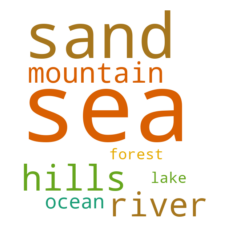

In [99]:
draw_wordcloud(Counter(features))

In [100]:
features = re.findall('(Spain|England|France|America|Portugal)',data)
Counter(features)

Counter({'America': 2, 'England': 13, 'Spain': 1})

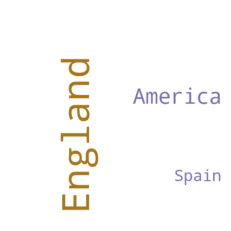

In [101]:
draw_wordcloud(Counter(features))

In [102]:
with open(book, 'r', encoding='utf-8', newline='\r\n') as f:
    datalines = [line.strip() for line in f.readlines()]

type(datalines)

list

In [103]:
datalines[0:50]

['\ufeffThe Project Gutenberg EBook of Treasure Island, by Robert Louis Stevenson',
 '',
 'This eBook is for the use of anyone anywhere in the United States and most',
 'other parts of the world at no cost and with almost no restrictions',
 'whatsoever.  You may copy it, give it away or re-use it under the terms of',
 'the Project Gutenberg License included with this eBook or online at',
 "www.gutenberg.org.  If you are not located in the United States, you'll have",
 'to check the laws of the country where you are located before using this ebook.',
 '',
 'Title: Treasure Island',
 '',
 'Author: Robert Louis Stevenson',
 '',
 'Illustrator: Louis Rhead',
 '',
 'Release Date: March 13, 1994 [EBook #120]',
 '[Most recently updated: October 28, 2020]',
 '',
 'Language: English',
 '',
 'Character set encoding: UTF-8',
 '',
 '*** START OF THIS PROJECT GUTENBERG EBOOK TREASURE ISLAND ***',
 '',
 '',
 '',
 '',
 'Produced by Judy Boss, John Hamm, Arthur DiBianca and David Widger',
 '',
 '',
 ''

In [104]:
for i, x in enumerate(datalines):
    if 'blackbeard' in x.lower():
        print(i, '>>>', x)

1314 >>> bloodthirstiest buccaneer that sailed. Blackbeard was a child to Flint.


In [105]:
stopwords = nltk.download('stopwords')
type(stopwords)

[nltk_data] Downloading package stopwords to /home/gda/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


bool

In [106]:
stopwords = nltk.corpus.stopwords.words('english')
type(stopwords)

list

In [107]:
ps = nltk.PorterStemmer()
type(ps)

nltk.stem.porter.PorterStemmer

In [108]:
ps.stem('Surely')

'sure'

In [109]:
stopwords[0:20]

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his']

In [110]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [111]:
string.printable

'0123456789abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~ \t\n\r\x0b\x0c'

In [112]:
def clean_text(text):
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    text = "".join([word.lower() for word in text if word in string.printable])
    tokens = re.split('\W+', text)
    text = [word for word in tokens if word not in stopwords]
    text = [ps.stem(word) for word in tokens if word not in stopwords]
    return text

In [113]:
clean_book = clean_text(data)
clean_book[0:20]

['project',
 'gutenberg',
 'ebook',
 'treasur',
 'island',
 'robert',
 'loui',
 'stevenson',
 'ebook',
 'use',
 'anyon',
 'anywher',
 'unit',
 'state',
 'part',
 'world',
 'cost',
 'almost',
 'restrict',
 'whatsoev']

In [114]:
words = re.findall(r'\w+', " ".join(clean_book))
Counter(words).most_common(20)

[('said', 322),
 ('one', 271),
 ('man', 259),
 ('captain', 234),
 ('like', 226),
 ('hand', 224),
 ('silver', 220),
 ('well', 186),
 ('say', 178),
 ('doctor', 176),
 ('could', 174),
 ('us', 171),
 ('would', 169),
 ('upon', 153),
 ('see', 151),
 ('time', 138),
 ('cri', 136),
 ('ship', 132),
 ('look', 131),
 ('come', 127)]

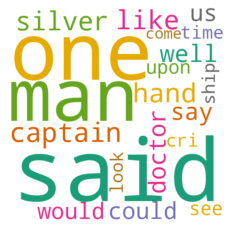

In [115]:
wc = dict(Counter(words).most_common(20))

draw_wordcloud(wc)

In [116]:
mywords = ['treasure', 'island', 'ship', 'ships', 'rum', 'pirates',
           'matey', 'captain', 'cannon', 'wenches', 'sailors',
           'gold', 'booty', 'yarr', 'poopdeck', 'port',
           'plank', 'sea', 'blackbeard', 'ale', 'slave']

special_words = [word for word in words if word in mywords]
Counter(special_words)

Counter({'island': 88,
         'gold': 12,
         'captain': 234,
         'sea': 77,
         'ship': 132,
         'rum': 55,
         'matey': 4,
         'plank': 5,
         'ale': 3,
         'blackbeard': 1,
         'port': 11,
         'slave': 2,
         'cannon': 3})

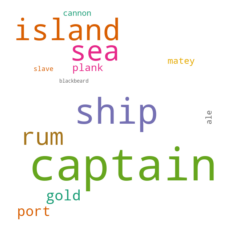

In [117]:
wc = Counter(special_words)

draw_wordcloud(wc)

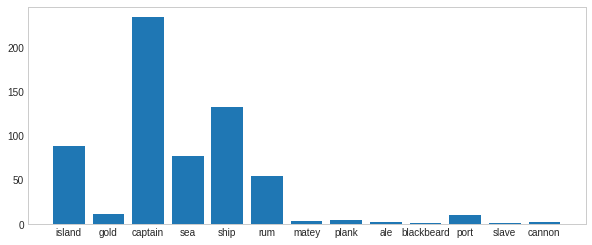

In [129]:
plt.figure(figsize=(10,4))
plt.bar(height=wc.values(), x=wc.keys())
plt.grid(False)
plt.show();

In [118]:
?plt.imshow

Signature:
plt.imshow(
    X,
    cmap=None,
    norm=None,
    aspect=None,
    interpolation=None,
    alpha=None,
    vmin=None,
    vmax=None,
    origin=None,
    extent=None,
    shape=<deprecated parameter>,
    filternorm=1,
    filterrad=4.0,
    imlim=<deprecated parameter>,
    resample=None,
    url=None,
    *,
    data=None,
    **kwargs,
)
Docstring:
Display data as an image; i.e. on a 2D regular raster.

The input may either be actual RGB(A) data, or 2D scalar data, which
will be rendered as a pseudocolor image. Note: For actually displaying
a grayscale image set up the color mapping using the parameters
``cmap='gray', vmin=0, vmax=255``.

Parameters
----------
X : array-like or PIL image
    The image data. Supported array shapes are:

    - (M, N): an image with scalar data. The values are mapped to
      colors using normalization and a colormap. See parameters *norm*,
      *cmap*, *vmin*, *vmax*.
    - (M, N, 3): an image with RGB values (0-1 float or 0-255 int).
 